In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv(r'C:\Users\Suresh\OneDrive\Desktop\PY BASIC2\testdataset.csv')

In [4]:
df.head(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4.0,5.0,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5.0,5.0,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4.0,5.0,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2.0,NaN,petrol
5,11006,audi,tt,Delhi,3000.0,Third,2015,4,1968,135.0,NaN,8,man,2.0,2.0,diesel
6,11007,bmw,x3,Chennai,10.0,Fourth & Above,2015,4,2979,20.0,NaN,5,auto,NaN,5.0,petrol
7,11008,audi,q3,Bangalore,18000.0,Third,2014,5,1968,130.0,NaN,6,auto,4.0,5.0,diesel
8,11009,skoda,octavia,Bangalore,270.0,Fourth & Above,2006,13,2000,103.0,compact,5,man,NaN,NaN,petrol
9,11010,toyota,auris,Delhi,3000.0,Third,2015,4,1197,85.0,NaN,5,man,4.0,5.0,petrol


In [5]:
df.shape

(5615, 16)

In [6]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
dtype: object

In [7]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

In [8]:
df.drop(columns=['body_type'],inplace=True)

In [9]:
df.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance               128
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
door_count             806
seat_count             891
fuel_type                0
dtype: int64

In [10]:
df.dropna(subset=['Distance '],inplace=True)

In [11]:
df.shape

(5487, 15)

In [12]:
df.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance                 0
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           139
Vroom Audit Rating       0
transmission             0
door_count             680
seat_count             765
fuel_type                0
dtype: int64

In [13]:
df['engine_power'].median()

np.float64(90.0)

In [14]:
df['engine_power'].mean()

np.float64(99.61667913238594)

In [15]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [16]:
df['door_count'].unique()

array([ 4.,  5.,  2., nan,  3.,  6.])

In [17]:
df['door_count'].value_counts()

door_count
4.0    3581
5.0     775
2.0     431
3.0      19
6.0       1
Name: count, dtype: int64

In [18]:
df['door_count'].mode()

0    4.0
Name: door_count, dtype: float64

In [19]:
df['door_count'].fillna(4.0,inplace=True)

In [20]:
df['seat_count'].unique()

array([ 5., nan,  2.,  4.,  7.,  3.])

In [21]:
df['seat_count'].value_counts()

seat_count
5.0    4098
4.0     455
7.0      82
2.0      79
3.0       8
Name: count, dtype: int64

In [22]:
df['seat_count'].mode()

0    5.0
Name: seat_count, dtype: float64

In [23]:
df['seat_count'].fillna(5.0,inplace=True)

In [24]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [25]:
df['fuel_type'].unique()

array(['petrol', 'diesel'], dtype=object)

In [26]:
df['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [27]:
df['fuel_type'].replace({'petrol':1,'diesel':0},inplace=True)

In [28]:
df['fuel_type'].unique()

array([1, 0])

In [29]:
df['transmission'].replace({'man':1,'auto':0},inplace=True)

In [30]:
df['transmission'].unique()

array([1, 0])

In [31]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission             int64
door_count             float64
seat_count             float64
fuel_type                int64
dtype: object

In [32]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [33]:
df['Maker'] = le.fit_transform(df['Maker'])

In [34]:
df['Distance '] =le.fit_transform(df['Distance '])

In [35]:
df['Owner Type'] = le.fit_transform(df['Owner Type'])

In [36]:
df['model'] = le.fit_transform(df['model'])

In [37]:
df['Location'] = le.fit_transform(df['Location'])

In [38]:
df.dtypes

Id                       int64
Maker                    int64
model                    int64
Location                 int64
Distance                 int64
Owner Type               int64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission             int64
door_count             float64
seat_count             float64
fuel_type                int64
dtype: object

In [39]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

<Axes: >

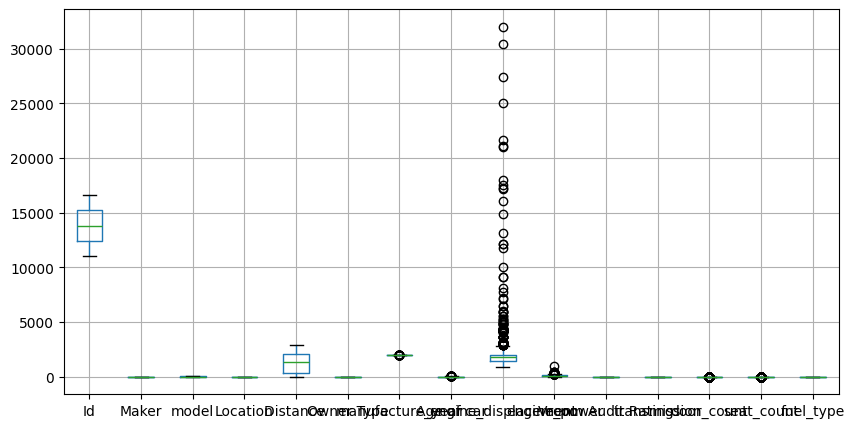

In [40]:
df.boxplot(figsize=(10,5),fontsize=10)

In [41]:
q1=df.quantile(0.25)

In [42]:
q3=df.quantile(0.75)

In [43]:
IQR=q3-q1

In [44]:
LL=q1-(1.5*IQR)

In [45]:
UL=q3+(1.5*IQR)

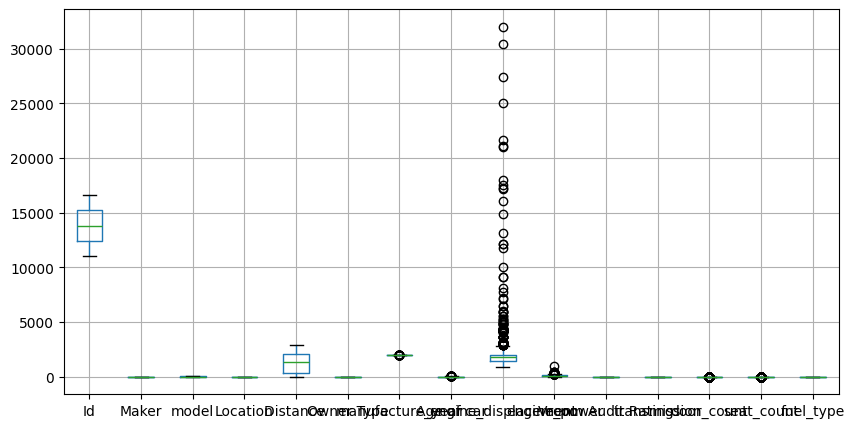

In [46]:
df.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [47]:
df1=df[(df>=LL) & (df<=UL)]

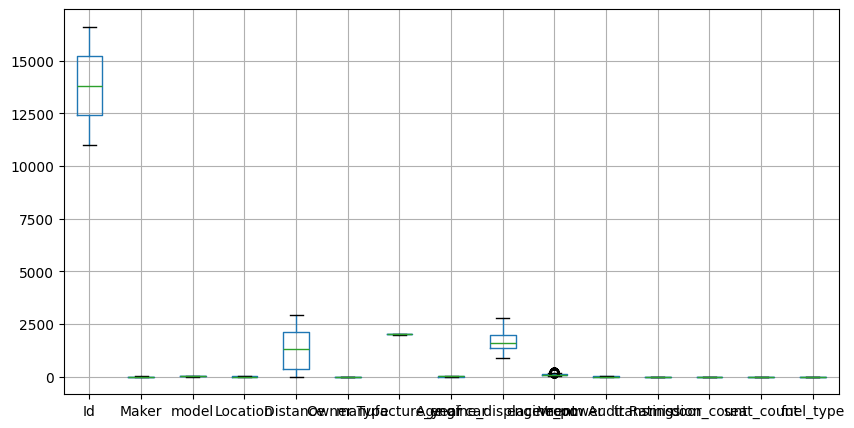

In [48]:
df1.boxplot(figsize=(10,5),fontsize=10)
plt.show()

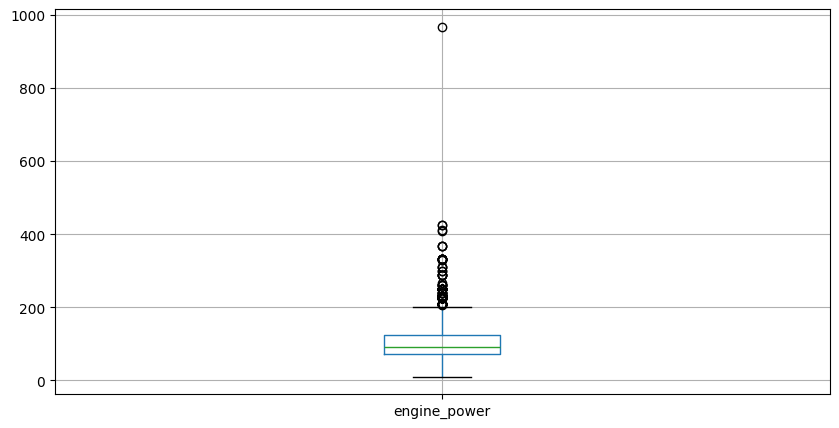

In [49]:
df[['engine_power']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [50]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [51]:
df1.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

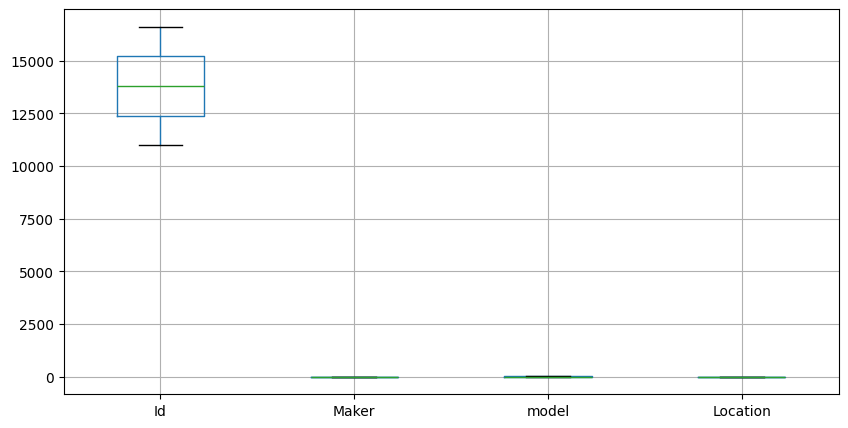

In [52]:
df1[['Id', 'Maker', 'model', 'Location']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

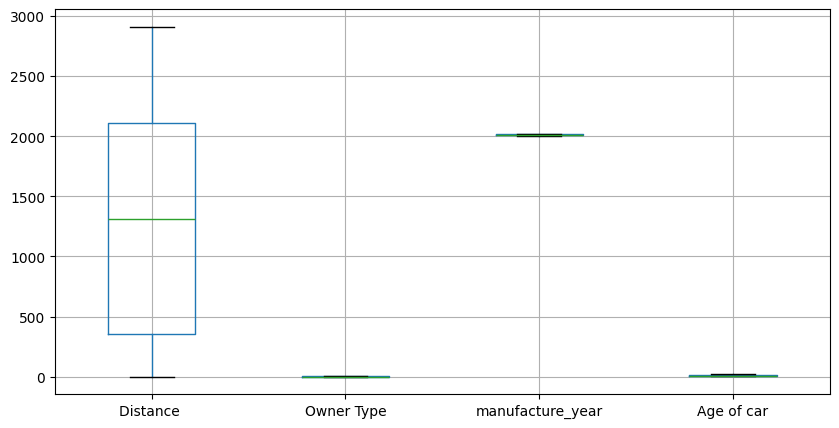

In [53]:
df1[['Distance ', 'Owner Type',
       'manufacture_year', 'Age of car']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

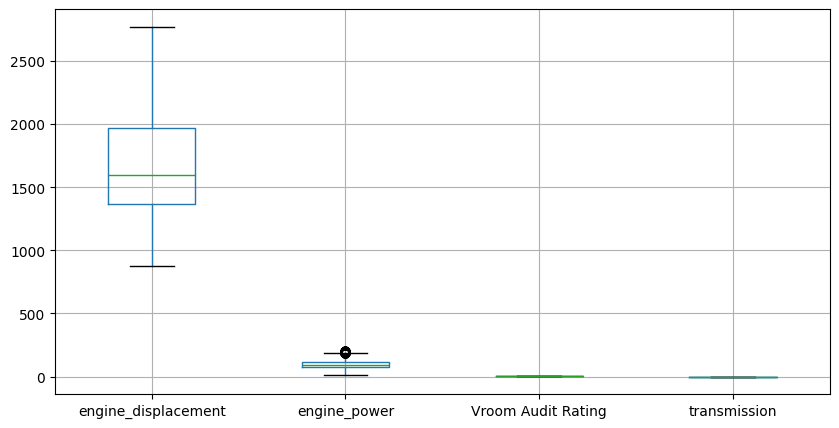

In [54]:
df1[['engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

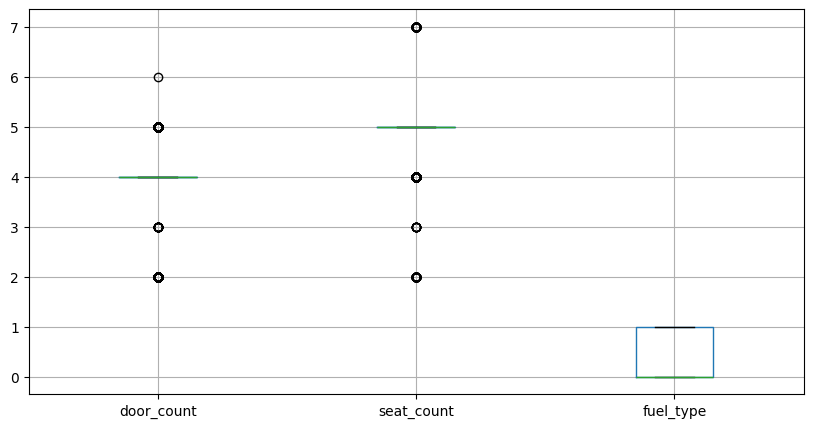

In [55]:
df[[ 'door_count', 'seat_count',
       'fuel_type']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [56]:
q1=df1['engine_power'].quantile(0.25)

In [57]:
q3=df1['engine_power'].quantile(0.75)

In [58]:
IQR=q3-q1

In [59]:
LL=q1-(1.5*IQR)

In [60]:
UL=q3+(1.5*IQR)

In [61]:
df2=df1[(df1['engine_power']>=LL) & (df1['engine_power']<=UL)]

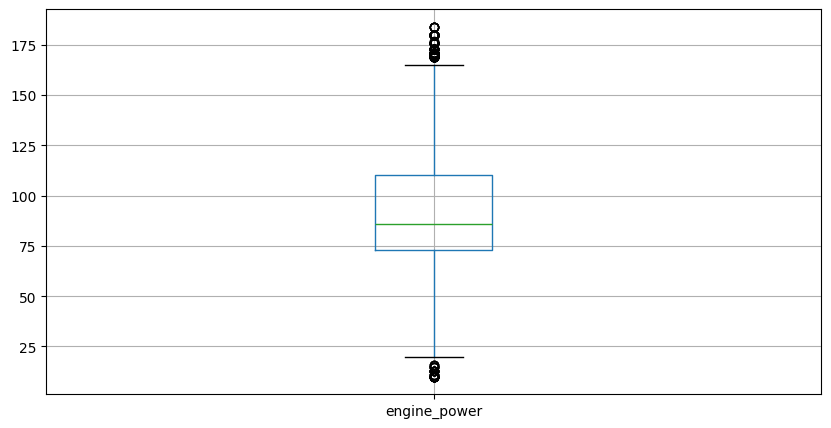

In [62]:
df2[['engine_power']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [63]:
q1=df2['engine_power'].quantile(0.25)

In [64]:
q3=df2['engine_power'].quantile(0.75)

In [65]:
IQR=q3-q1

In [66]:
LL=q1-(1.5*IQR)

In [67]:
UL=q3+(1.5*IQR)

In [68]:
df3=df2[(df2['engine_power']>=LL) & (df2['engine_power']<=UL)]

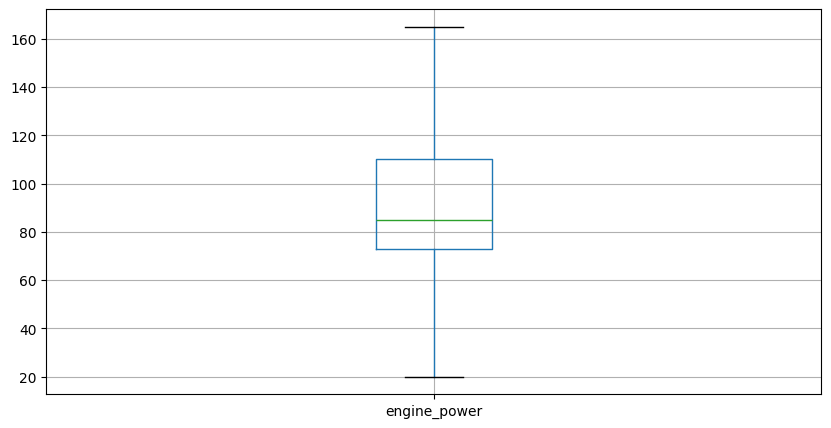

In [69]:
df3[['engine_power']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [70]:
q1=df1['door_count'].quantile(0.25)


In [71]:
q3=df1['door_count'].quantile(0.75)

In [72]:
IQR=q3-q1

In [73]:
LL=q1-(1.5*IQR)

In [74]:
UL=q3+(1.5*IQR)

In [75]:
df2=df1[(df1['door_count']>=LL) & (df1['door_count']<=UL)]

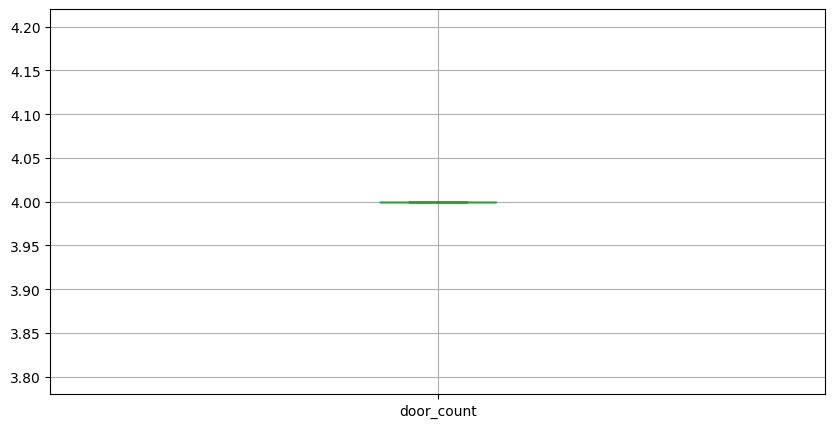

In [76]:
df2[['door_count']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [77]:
q1=df1['seat_count'].quantile(0.25)

In [78]:
q3=df1['seat_count'].quantile(0.75)

In [79]:
IQR=q3-q1

In [80]:
LL=q1-(1.5*IQR)

In [81]:
UL=q3+(1.5*IQR)

In [82]:
df2=df1[(df1['seat_count']>=LL) & (df1['seat_count']<=UL)]

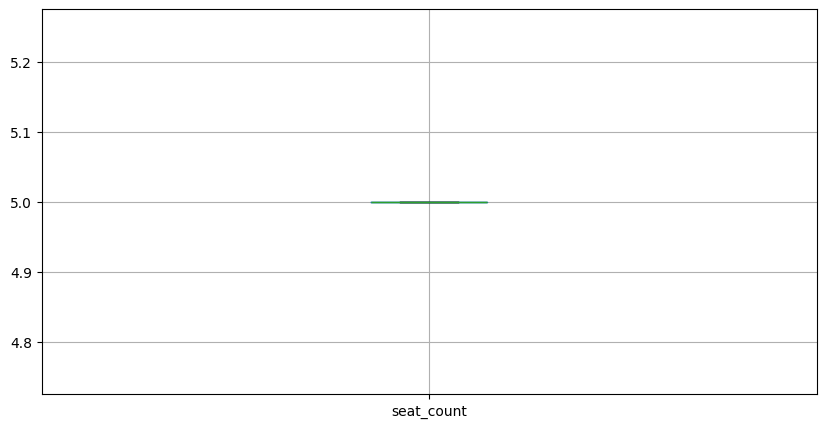

In [83]:
df2[['seat_count']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

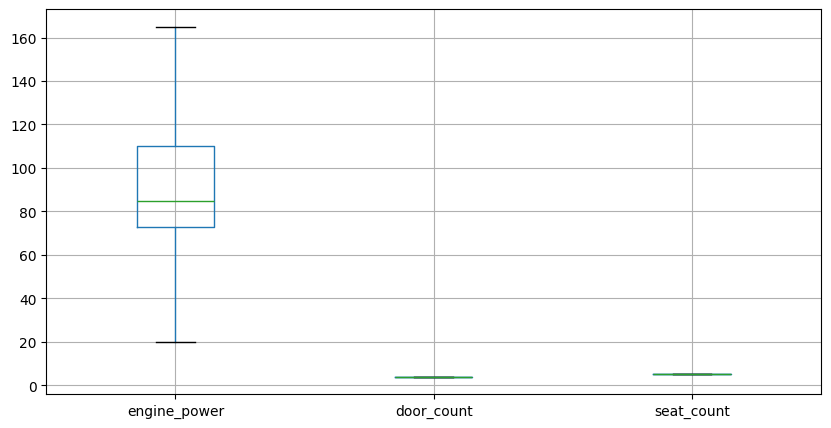

In [84]:
df3[['engine_power','door_count','seat_count']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [85]:
df3.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                  0
Owner Type                0
manufacture_year         46
Age of car               46
engine_displacement     103
engine_power              0
Vroom Audit Rating        0
transmission              0
door_count             1126
seat_count              502
fuel_type                 0
dtype: int64

In [86]:
df3['manufacture_year'].value_counts()
df1['manufacture_year'].fillna(2015.0,inplace=True)

In [87]:
df3['Age of car'].value_counts()
df3['Age of car'].fillna(4.0,inplace=True)


In [88]:
df3['engine_displacement'].value_counts()
df3['engine_displacement'].fillna(1968.0,inplace=True)

In [89]:
df3['door_count'].value_counts()
df3['door_count'].fillna(4.0,inplace=True)

In [90]:
df3['seat_count'].value_counts()
df3['seat_count'].fillna(5.0,inplace=True)

In [91]:
df3.isnull().sum()

Id                      0
Maker                   0
model                   0
Location                0
Distance                0
Owner Type              0
manufacture_year       46
Age of car              0
engine_displacement     0
engine_power            0
Vroom Audit Rating      0
transmission            0
door_count              0
seat_count              0
fuel_type               0
dtype: int64

In [92]:
df3.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

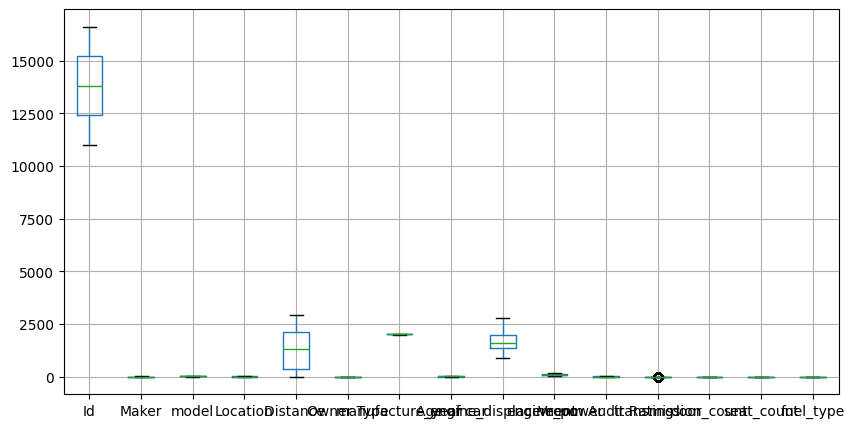

In [93]:
df3.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [94]:
q1=df3['transmission'].quantile(0.25)


In [95]:
q3=df3['transmission'].quantile(0.75)

In [96]:
IQR=q3-q1

In [97]:
LL=q1-(1.5*IQR)

In [98]:
UL=q3+(1.5*IQR)

In [99]:
df4=df3[(df3['transmission']>=LL) & (df3['transmission']<=UL)]

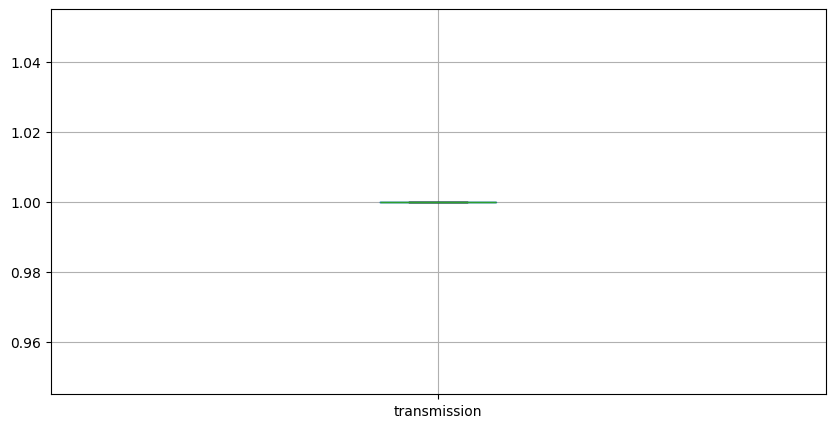

In [100]:
df4[['transmission']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

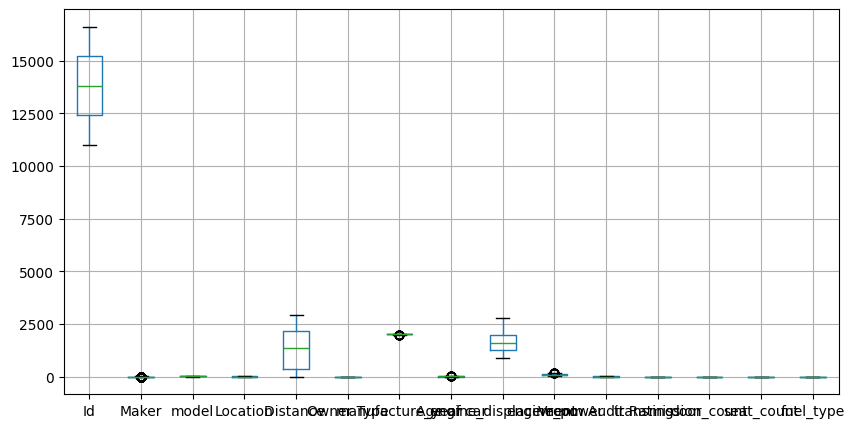

In [101]:
df4.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [102]:
df4.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

In [103]:
q1=df4['Maker'].quantile(0.25)
q3=df4['Maker'].quantile(0.75)
IQR=q3-q1
LL=q1-(1.5*IQR)
UL=q3+(1.5*IQR)

In [104]:
df5=df4[(df4['Maker']>=LL) & (df4['Maker']<=UL)]

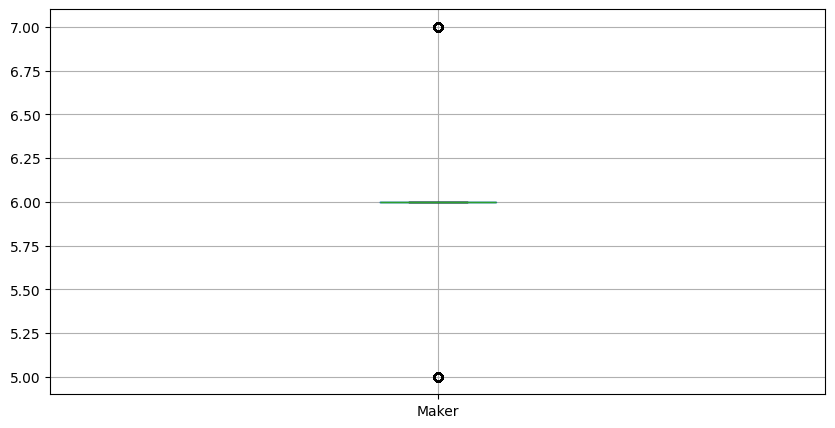

In [105]:
df5[['Maker']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [106]:
q1=df5['Maker'].quantile(0.25)
q3=df5['Maker'].quantile(0.75)
IQR=q3-q1
LL=q1-(1.5*IQR)
UL=q3+(1.5*IQR)

In [107]:
df6=df5[(df5['Maker']>=LL) & (df5['Maker']<=UL)]

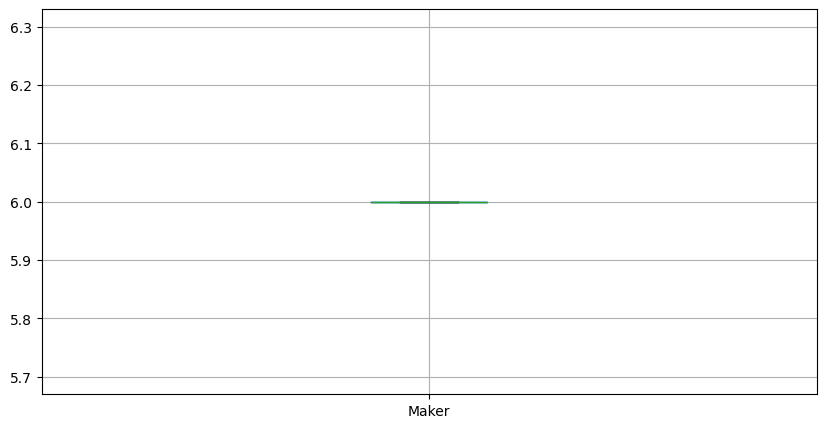

In [108]:
df6[['Maker']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

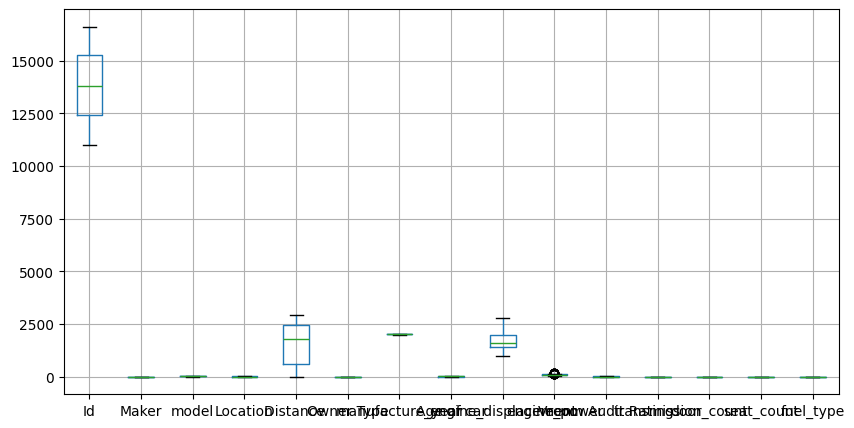

In [109]:
df6.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [110]:
q1=df6['engine_power'].quantile(0.25)
q3=df6['engine_power'].quantile(0.75)
IQR=q3-q1
LL=q1-(1.5*IQR)
UL=q3+(1.5*IQR)

In [111]:
df7=df6[(df6['engine_power']>=LL) & (df6['engine_power']<=UL)]

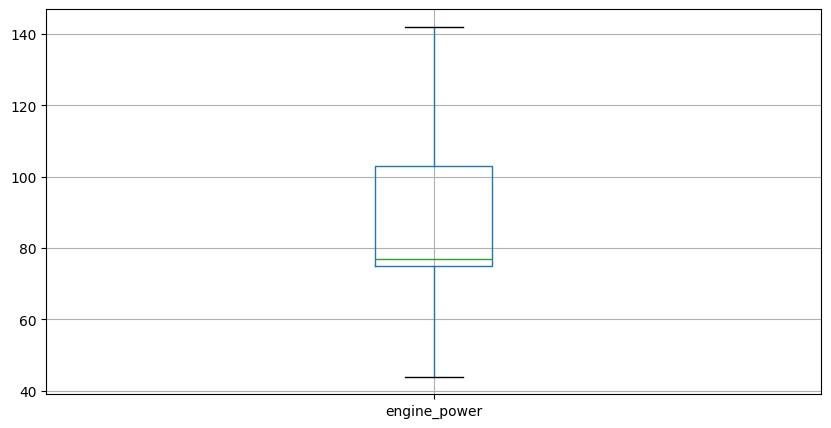

In [112]:
df7[['engine_power']].boxplot(figsize=(10,5),fontsize=10)
plt.show()

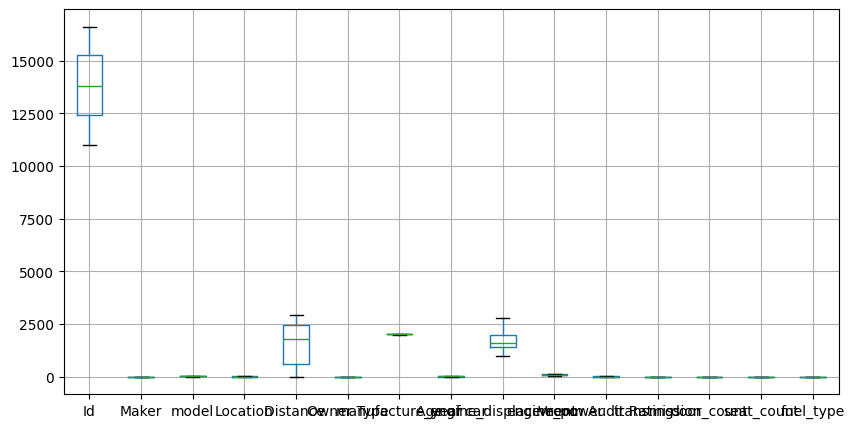

In [113]:
df7.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [114]:
df7.isnull().sum()

Id                      0
Maker                   0
model                   0
Location                0
Distance                0
Owner Type              0
manufacture_year       11
Age of car              0
engine_displacement     0
engine_power            0
Vroom Audit Rating      0
transmission            0
door_count              0
seat_count              0
fuel_type               0
dtype: int64

In [115]:
df7['manufacture_year'].value_counts()
df7['manufacture_year'].fillna(2015.0,inplace=True)

In [116]:
df7.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

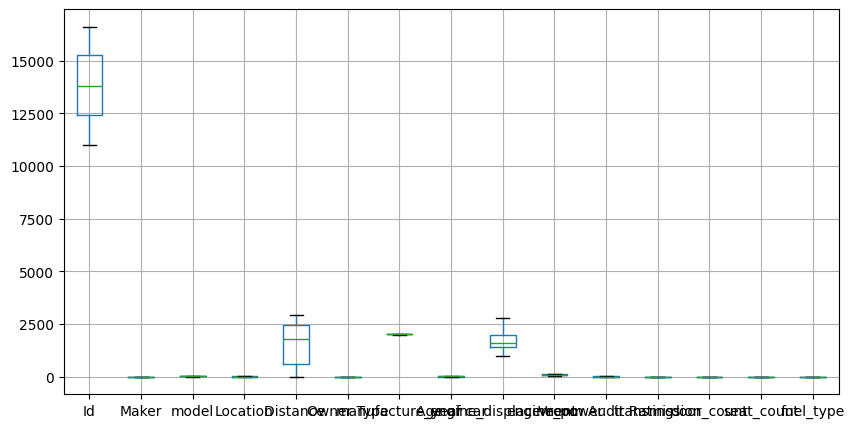

In [117]:
df7.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [118]:
df8=df7.copy()

In [119]:
df8.head(5)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,6,8,9,2259,0,2007.0,12.0,1595.0,75.0,5,1,4.0,5.0,1
1,11002,6,14,3,760,3,2014.0,5.0,1598.0,77.0,4,1,4.0,5.0,0
2,11003,6,8,3,793,2,2014.0,5.0,1968.0,110.0,5,1,4.0,5.0,0
8,11009,6,8,1,45,1,2006.0,13.0,2000.0,103.0,5,1,4.0,5.0,1
13,11014,6,8,5,35,2,2015.0,4.0,1968.0,135.0,6,1,4.0,5.0,0


In [120]:
df8.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [121]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [122]:
ss=StandardScaler()

In [123]:
mms=MinMaxScaler()

In [124]:
df8_mms=pd.DataFrame(mms.fit_transform(df8),columns=df8.columns)

In [125]:
df8_mms

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,0.000000,0.0,0.263158,0.9,0.776022,0.000000,0.500000,0.500000,0.336343,0.316327,0.25,0.0,0.0,0.0,1.0
1,0.000178,0.0,0.578947,0.3,0.261079,1.000000,0.888889,0.111111,0.338036,0.336735,0.00,0.0,0.0,0.0,0.0
2,0.000356,0.0,0.263158,0.3,0.272415,0.666667,0.888889,0.111111,0.546840,0.673469,0.25,0.0,0.0,0.0,0.0
3,0.001426,0.0,0.263158,0.1,0.015459,0.333333,0.444444,0.555556,0.564898,0.602041,0.25,0.0,0.0,0.0,1.0
4,0.002316,0.0,0.263158,0.5,0.012023,0.666667,0.944444,0.055556,0.546840,0.928571,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,0.996971,0.0,0.263158,0.9,0.798695,1.000000,0.444444,0.555556,0.546840,0.602041,0.75,0.0,0.0,0.0,0.0
1671,0.998574,0.0,0.000000,0.5,0.582618,1.000000,0.777778,0.222222,0.000000,0.112245,0.50,0.0,0.0,0.0,1.0
1672,0.999644,0.0,0.263158,0.9,0.775335,0.000000,0.722222,0.277778,0.546840,0.602041,1.00,0.0,0.0,0.0,0.0
1673,0.999822,0.0,0.684211,0.0,0.987633,0.000000,0.388889,0.611111,0.506208,0.530612,0.50,0.0,0.0,0.0,0.0


In [126]:
df8_ss=pd.DataFrame(ss.fit_transform(df8),columns=df8.columns)

In [127]:
df8_ss

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,-1.744387,0.0,-0.545957,1.270644,0.720484,-1.319401,-0.684556,0.684556,-0.161867,-0.395468,-0.697566,0.0,0.0,0.0,1.093289
1,-1.743770,0.0,0.705895,-0.612277,-0.808045,1.336845,0.897316,-0.897316,-0.152506,-0.295670,-1.414390,0.0,0.0,0.0,-0.914671
2,-1.743154,0.0,-0.545957,-0.612277,-0.774395,0.451430,0.897316,-0.897316,1.001999,1.350996,-0.697566,0.0,0.0,0.0,-0.914671
3,-1.739455,0.0,-0.545957,-1.239918,-1.537130,-0.433986,-0.910538,0.910538,1.101848,1.001703,-0.697566,0.0,0.0,0.0,1.093289
4,-1.736373,0.0,-0.545957,0.015363,-1.547327,0.451430,1.123298,-1.123298,1.001999,2.598471,0.019258,0.0,0.0,0.0,-0.914671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1.704744,0.0,-0.545957,1.270644,0.787784,1.336845,-0.910538,0.910538,1.001999,1.001703,0.736082,0.0,0.0,0.0,-0.914671
1671,1.710292,0.0,-1.589166,0.015363,0.146393,1.336845,0.445353,-0.445353,-2.021557,-1.393448,0.019258,0.0,0.0,0.0,1.093289
1672,1.713991,0.0,-0.545957,1.270644,0.718445,-1.319401,0.219371,-0.219371,1.001999,1.001703,1.452906,0.0,0.0,0.0,-0.914671
1673,1.714607,0.0,1.123179,-1.553738,1.348619,-1.319401,-1.136520,1.136520,0.777338,0.652410,0.019258,0.0,0.0,0.0,-0.914671


In [128]:
df8.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

In [129]:
df8.shape

(1675, 15)

In [130]:
df8.to_csv('preprocessed_data.csv',index=False)

In [131]:
df8.shape

(1675, 15)